# Unit 5 - Financial Planning

In [72]:
# Initial imports
import os
import json
import requests
import symbol
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [73]:
# Load .env enviroment variables
load_dotenv()



True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [74]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [75]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [76]:
# Fetch current BTC price
# YOUR CODE HERE!
#my_btc_price = 19
btc_response_data = requests.get(btc_url)
#print(btc_response_data)
btc_response_content = btc_response_data.content
btc_data = btc_response_data.json()
#print(json.dumps(btc_data, indent=4))
my_btc_price = btc_data['data']['1']['quotes']['USD']['price']
#my_btc_price


In [77]:
# Fetch current ETH price
# YOUR CODE HERE!
eth_response_data = requests.get(eth_url)
#print(eth_response_data)
eth_response_content = eth_response_data.content
eth_data = eth_response_data.json()
#print(json.dumps(eth_data, indent=4))
my_eth_price = eth_data['data']['1027']['quotes']['USD']['price']
#my_eth_price


In [78]:
# Compute current value of my crpto
# YOUR CODE HERE!

my_btc_value = my_btc * my_btc_price
my_eth_value = my_eth * my_eth_price

In [79]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $23091.61
The current value of your 5.3 ETH is $6911.31


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [123]:
# Set current amount of shares
my_spy = 50
my_agg = 200


In [124]:
# Set Alpaca API key and secret
# YOUR CODE HERE!

alpaca_api_key = os.getenv("ALPACA_API_KEY")
print(f"Alpaca Key type: {type(alpaca_api_key)}")

Alpaca Key type: <class 'str'>


In [125]:
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Secret Key type: <class 'str'>


In [126]:
# Create the Alpaca API object
# YOUR CODE HERE!

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [127]:
# Format current date as ISO format
# YOUR CODE HERE!

today = pd.Timestamp("2022-10-13", tz="America/New_York").isoformat()


In [128]:
# Set the tickers
tickers = ["SPY", "AGG"]



In [129]:
# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!

df_stocksnbonds = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df



In [130]:
df_stocksnbonds.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-10-13 04:00:00+00:00,94.23,95.44,94.18,95.18,6231878,23778,95.068272,AGG
2022-10-13 04:00:00+00:00,349.43,367.51,348.11,365.97,145171940,1098996,359.798331,SPY


In [131]:

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!

# Separate ticker data
SPY = df_stocksnbonds[df_stocksnbonds['symbol'] == 'SPY'].drop('symbol', axis=1)
AGG = df_stocksnbonds[df_stocksnbonds['symbol'] == 'AGG'].drop('symbol', axis=1)


In [132]:
df_stocksnbonds.head()


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-10-13 04:00:00+00:00,94.23,95.44,94.18,95.18,6231878,23778,95.068272,AGG
2022-10-13 04:00:00+00:00,349.43,367.51,348.11,365.97,145171940,1098996,359.798331,SPY


In [133]:
# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stocksnbonds = pd.concat([SPY, AGG],axis=1, keys=['SPY', 'AGG'])


In [134]:
df_stocksnbonds

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2022-10-13 04:00:00+00:00  349.43  367.51  348.11  365.97  145171940   

                                                     AGG                       \
                          trade_count        vwap   open   high    low  close   
timestamp                                                                       
2022-10-13 04:00:00+00:00     1098996  359.798331  94.23  95.44  94.18  95.18   

                                                           
                            volume trade_count       vwap  
timestamp                                                  
2022-10-13 04:00:00+00:00  6231878       23778  95.068272

In [135]:
# Preview DataFrame
# YOUR CODE HERE!
df_stocksnbonds
#aapl_price = float(df_portfolio["AAPL"]["close"])

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2022-10-13 04:00:00+00:00  349.43  367.51  348.11  365.97  145171940   

                                                     AGG                       \
                          trade_count        vwap   open   high    low  close   
timestamp                                                                       
2022-10-13 04:00:00+00:00     1098996  359.798331  94.23  95.44  94.18  95.18   

                                                           
                            volume trade_count       vwap  
timestamp                                                  
2022-10-13 04:00:00+00:00  6231878       23778  95.068272

In [136]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_stocksnbonds["AGG"]["close"])
spy_close_price = float(df_stocksnbonds["SPY"]["close"])



In [139]:
# Print AGG and SPY close prices
print(f"Current SPY closing price: ${spy_close_price}")
print(f"Current AGG closing price: ${agg_close_price}")


Current SPY closing price: $365.97
Current AGG closing price: $95.18


In [140]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18298.50
The current value of your 200 AGG shares is $19036.00


### Savings Health Analysis

In [141]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!

my_crypto = my_btc_value + my_eth_value
my_shares = my_agg_value + my_spy_value

# Create savings DataFrame
# YOUR CODE HERE!


investment_data = {
    "amount": [my_crypto, my_shares]
}

# Set the asset class
investments = ["crypto", "shares"]

# Create the shares DataFrame with `tickers` as index
df_savings= pd.DataFrame(investment_data, index=investments)

# Display savings DataFrame
display(df_savings)

,amount
crypto,30002.918
shares,37334.500


In [142]:
# Consolidate financial assets data
# YOUR CODE HERE!

# Create savings DataFrame
# YOUR CODE HERE!

# Display savings DataFrame
display(df_savings)

,amount
crypto,30002.918
shares,37334.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

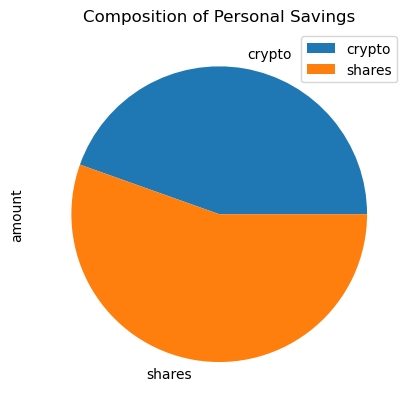

In [143]:
# Plot savings pie chart
# YOUR CODE HERE!
#df_shares.plot.pie(y="shares", title="Stocks Portfolio Composition")
df_savings.plot.pie(y='amount', title="Composition of Personal Savings")

In [144]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund



36000

In [145]:
# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = df_savings['amount']['crypto'] + df_savings['amount']['shares']
total_savings


67337.418

In [146]:
# Validate saving health
# YOUR CODE HERE!
if (total_savings < emergency_fund):
    print(f'Well done so far, you need to save an additional ${(emergency_fund - total_savings):0.2f}' + ' to reach you financial goal')
elif(total_savings == emergency_fund):
    print('Congratulations on reaching your financial goal of having enough savings to cover an emergency')
else:
    print(f'Congratulations! You have saved {total_savings:0.2f} which is ${(total_savings - emergency_fund):0.2f} more than the amount required to cover emergencies')



Congratulations! You have saved 67337.42 which is $31337.42 more than the amount required to cover emergencies


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [171]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [172]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
df_stock_data.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-05-02 04:00:00+00:00,110.74,110.7400,110.5200,110.61,3553939,15119,110.627199,AGG
2016-05-03 04:00:00+00:00,110.89,110.9450,110.7500,110.81,3044940,15662,110.865995,AGG
2016-05-04 04:00:00+00:00,110.91,110.9315,110.7595,110.86,2920608,13982,110.879063,AGG
2016-05-05 04:00:00+00:00,110.92,111.1600,110.8010,111.14,3008142,15707,111.028363,AGG
2016-05-06 04:00:00+00:00,111.12,111.1200,110.9700,110.97,2718710,12697,111.031967,AGG


In [173]:
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!

AGG = df_stock_data[df_stock_data['symbol'] == 'AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol'] == 'SPY'].drop('symbol', axis=1)



In [174]:
# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([SPY, AGG],axis=1, keys=['SPY', 'AGG'])
# Display sample data
df_stock_data.head(10)

SPY                                       \
                             open      high     low   close     volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  206.90  208.1800  206.41  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.8000  205.28  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.8500  204.42  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.9800  204.47  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.7700  203.88  205.70   89131004   
2016-05-09 04:00:00+00:00  205.58  206.4000  205.36  205.89   74374922   
2016-05-10 04:00:00+00:00  206.64  208.5000  206.64  208.46   77472207   
2016-05-11 04:00:00+00:00  207.89  208.5400  206.50  206.50   81726989   
2016-05-12 04:00:00+00:00  207.29  207.4899  205.37  206.55   89586108   
2016-05-13 04:00:00+00:00  206.23  206.8600  204.38  204.72   96474527   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2016-05-02 04:00:00+00:00      263580  207.294812  110.74  110.7400  110.5200   
2016-05-03 04:00:00+00:00      377518  206.312060  110.89  110.9450  110.7500   
2016-05-04 04:00:00+00:00      345261  205.090172  110.91  110.9315  110.7595   
2016-05-05 04:00:00+00:00      280622  205.141555  110.92  111.1600  110.8010   
2016-05-06 04:00:00+00:00      340335  204.937074  111.12  111.1200  110.9700   
2016-05-09 04:00:00+00:00      263989  205.884750  111.11  111.1400  111.0050   
2016-05-10 04:00:00+00:00      267366  207.804326  111.06  111.1000  110.9900   
2016-05-11 04:00:00+00:00      295512  207.408406  111.06  111.2600  111.0200   
2016-05-12 04:00:00+00:00      344294  206.451838  110.92  111.1000  110.9200   
2016-05-13 04:00:00+00:00      359281  205.579209  111.08  111.2300  111.0300   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2016-05-02 04:00:00+00:00  110.61  3553939       15119  110.627199  
2016-05-03 04:00:00+00:00  110.81  3044940       15662  110.865995  
2016-05-04 04:00:00+00:00  110.86  2920608       13982  110.879063  
2016-05-05 04:00:00+00:00  111.14  3008142       15707  111.028363  
2016-05-06 04:00:00+00:00  110.97  2718710       12697  111.031967  
2016-05-09 04:00:00+00:00  111.04  2173463       12416  111.070531  
2016-05-10 04:00:00+00:00  111.09  2103822       10989  111.042210  
2016-05-11 04:00:00+00:00  111.09  2507055        9310  111.139311  
2016-05-12 04:00:00+00:00  110.99  1938846        8182  111.018576  
2016-05-13 04:00:00+00:00  111.20  1511386        9321  111.155567

In [184]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [185]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirtyyear.portfolio_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00      263580  207.294812          NaN  110.74   
2016-05-03 04:00:00+00:00      377518  206.312060    -0.009133  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    -0.005676  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    -0.000049  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074     0.003659  111.12   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.61  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.81  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.86  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.14  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.97  2718710       12697   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.627199          NaN  
2016-05-03 04:00:00+00:00  110.865995     0.001808  
2016-05-04 04:00:00+00:00  110.879063     0.000451  
2016-05-05 04:00:00+00:00  111.028363     0.002526  
2016-05-06 04:00:00+00:00  111.031967    -0.001530

In [186]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\P630461\Documents\FinTechBC-Homework-Unit5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999440,0.993922,0.984775,1.016434,1.004262,1.007676,1.006160,0.997550,1.003869,1.003422,...,0.987106,1.008165,0.999165,1.006302,0.999019,0.991856,0.982582,0.986828,1.003386,1.000515
2,0.987468,0.991708,0.994630,1.008292,1.004841,1.008693,1.013308,0.999572,1.013396,0.997035,...,0.997782,1.004471,1.004284,1.013354,1.010804,0.984198,0.990194,0.990848,1.012440,1.006205
3,0.983586,0.995510,0.986702,1.006335,0.994482,1.010373,1.007503,1.003193,1.005435,0.992905,...,0.985278,1.003732,0.992876,1.015465,1.016357,0.986819,0.986221,1.000494,1.008278,1.001418
4,0.990248,1.000991,0.996496,1.002349,0.992999,1.008089,1.009205,1.005036,1.008074,0.992669,...,0.990790,1.008258,1.007018,1.024265,1.016562,0.984525,0.968030,1.001495,0.996796,0.991111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,43.827946,14.719513,3.424975,12.445766,18.255976,74.522582,22.204061,13.820843,35.848825,9.035187,...,11.765159,8.963988,13.504779,34.177858,5.439787,5.226846,33.817442,13.624636,19.689982,9.282696
7557,43.983025,14.831055,3.420948,12.426335,18.210576,74.472885,22.282155,13.925497,35.944404,9.011178,...,11.821694,9.032186,13.436496,34.555725,5.435045,5.260676,34.245177,13.560965,19.635058,9.325200
7558,44.055515,14.778913,3.443154,12.594698,18.021966,73.952101,22.493033,13.919250,36.119015,9.051859,...,11.860520,9.104478,13.552554,34.471956,5.366580,5.159034,34.039988,13.660821,19.622920,9.309805
7559,43.922249,14.911692,3.447759,12.577678,17.945797,73.976347,22.527133,14.028584,35.782674,9.212754,...,11.841512,9.155140,13.505425,34.081087,5.428983,5.252732,34.200789,13.729028,19.532294,9.326573


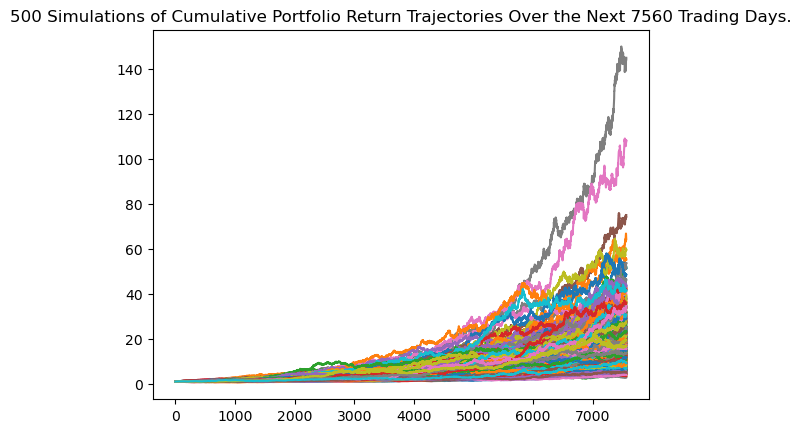

In [187]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_thirtyyear.plot_simulation()


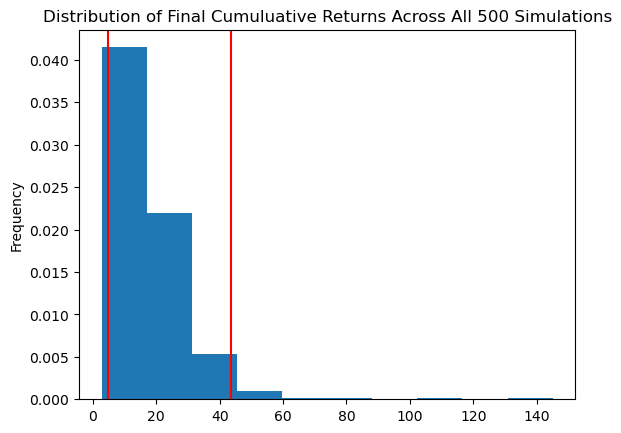

In [188]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_thirtyyear.plot_distribution()


### Retirement Analysis

In [189]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean             17.630829
std              12.550647
min               2.769336
25%               9.881337
50%              14.738530
75%              22.326966
max             145.029844
95% CI Lower      4.602820
95% CI Upper     43.599254
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [190]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $92056.41 and $871985.07


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [191]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $138084.61 and $1307977.61


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [194]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [195]:
#Printing the simulation input data
MC_fiveyear.portfolio_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00      263580  207.294812          NaN  110.74   
2016-05-03 04:00:00+00:00      377518  206.312060    -0.009133  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    -0.005676  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    -0.000049  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074     0.003659  111.12   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.61  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.81  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.86  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.14  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.97  2718710       12697   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.627199          NaN  
2016-05-03 04:00:00+00:00  110.865995     0.001808  
2016-05-04 04:00:00+00:00  110.879063     0.000451  
2016-05-05 04:00:00+00:00  111.028363     0.002526  
2016-05-06 04:00:00+00:00  111.031967    -0.001530

In [196]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\P630461\Documents\FinTechBC-Homework-Unit5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996167,0.999794,0.996463,0.999410,0.988517,1.001050,1.004136,0.996887,0.988321,0.993717,...,1.009365,0.987757,1.003932,0.992859,1.009501,0.987825,1.001876,1.009519,1.004049,0.996450
2,0.986065,0.986641,1.001195,0.998249,0.983690,0.998911,1.007452,0.985936,0.992916,0.988824,...,1.015355,0.989539,1.009012,0.977664,1.016074,0.989355,1.002637,1.022446,1.004925,0.992108
3,0.992092,0.988442,0.992564,0.991382,0.974033,1.006253,1.013399,0.992258,0.998498,0.989793,...,1.013571,0.988461,1.015171,0.975080,1.017116,0.989833,0.989710,1.009673,1.000499,0.994432
4,0.984547,0.998601,0.988595,0.989548,0.967282,1.016820,1.003193,0.982947,0.991610,0.986963,...,1.015338,0.988716,1.019074,0.973145,1.021529,0.986475,0.983959,1.007682,1.004192,1.000522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.040791,1.419687,1.325336,1.863631,1.880662,0.913288,2.069435,1.728893,1.243813,1.647521,...,2.936023,1.663671,1.304394,0.992258,1.790661,1.344502,1.365297,1.546830,1.221514,1.830327
1257,1.044764,1.413315,1.317411,1.871142,1.900527,0.913608,2.079431,1.726637,1.255497,1.622759,...,2.951960,1.671989,1.318309,0.986971,1.777556,1.354917,1.359149,1.562464,1.243941,1.851957
1258,1.042313,1.407151,1.329123,1.879975,1.915761,0.910637,2.098419,1.743704,1.273363,1.623548,...,2.959458,1.691250,1.322985,0.982995,1.772767,1.334806,1.348352,1.578824,1.244096,1.865797
1259,1.044789,1.390799,1.329036,1.903566,1.905422,0.916447,2.078137,1.729564,1.276223,1.617680,...,2.943024,1.707603,1.321146,0.980865,1.751394,1.333653,1.346340,1.575343,1.239471,1.852142


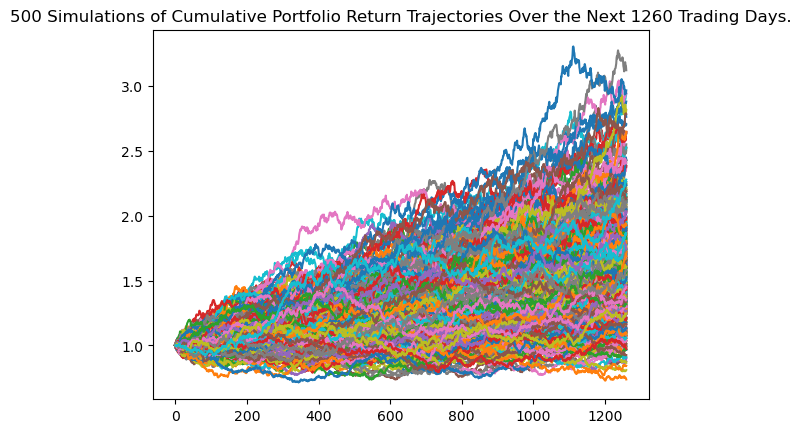

In [197]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_fiveyear.plot_simulation()


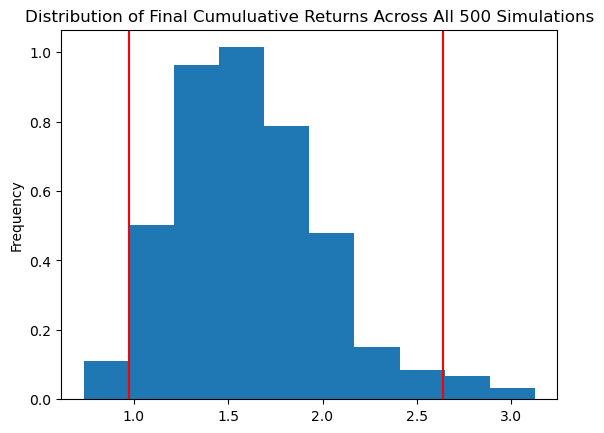

In [198]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_fiveyear.plot_distribution()


In [199]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean              1.617722
std               0.402740
min               0.737529
25%               1.339266
50%               1.562357
75%               1.851668
max               3.123601
95% CI Lower      0.976297
95% CI Upper      2.637698
Name: 1260, dtype: float64


In [202]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $58577.81 and $158261.9


### Ten Years Retirement Option

In [204]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [205]:
#Printing the simulation input data
MC_tenyear.portfolio_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00      263580  207.294812          NaN  110.74   
2016-05-03 04:00:00+00:00      377518  206.312060    -0.009133  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    -0.005676  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    -0.000049  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074     0.003659  111.12   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.61  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.81  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.86  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.14  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.97  2718710       12697   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.627199          NaN  
2016-05-03 04:00:00+00:00  110.865995     0.001808  
2016-05-04 04:00:00+00:00  110.879063     0.000451  
2016-05-05 04:00:00+00:00  111.028363     0.002526  
2016-05-06 04:00:00+00:00  111.031967    -0.001530

In [206]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\P630461\Documents\FinTechBC-Homework-Unit5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999794,0.989775,0.992185,1.002660,0.993736,1.004385,1.011091,0.998234,0.999738,1.005849,...,1.004260,0.996487,1.007947,1.006377,0.985600,1.000785,0.998089,0.995995,1.009570,1.008508
2,0.990386,0.985728,0.991988,1.003717,0.987360,1.009099,1.006340,1.002750,0.996664,0.993174,...,1.003448,0.985271,1.018161,0.996217,0.980043,0.989356,0.985941,0.998686,1.014208,1.007668
3,0.984531,0.977455,1.001180,1.012100,0.982419,1.009437,1.007155,1.005649,1.000788,1.002554,...,1.009350,0.980277,1.015964,1.000908,0.973777,0.985185,0.980807,0.996990,1.017567,1.010098
4,0.974248,0.973708,0.995628,1.018446,0.981296,1.010600,1.015027,1.018949,1.004982,1.007521,...,1.010112,0.974678,1.016373,0.999483,0.980651,0.977995,0.988488,0.993134,1.012687,1.010449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.746925,3.930990,2.416485,2.299827,1.814692,5.910049,3.021618,3.107676,1.979897,1.113511,...,2.398902,2.580830,1.694599,2.708439,2.058284,2.169326,3.386596,2.269509,1.578772,0.898018
2517,1.769475,3.934538,2.443418,2.280111,1.834248,5.905922,3.034062,3.102393,1.974691,1.105102,...,2.372056,2.564956,1.710327,2.717711,2.048851,2.171874,3.400606,2.275130,1.586942,0.900479
2518,1.759508,3.932307,2.420621,2.269791,1.841557,5.927499,3.027223,3.097011,1.970307,1.105501,...,2.373530,2.581916,1.709905,2.687200,2.062981,2.178671,3.420814,2.277463,1.587214,0.887967
2519,1.755455,3.913223,2.404560,2.260478,1.811766,5.975833,3.037095,3.126683,1.975614,1.103185,...,2.366243,2.611446,1.720823,2.688634,2.043910,2.197701,3.396203,2.300794,1.594120,0.881704


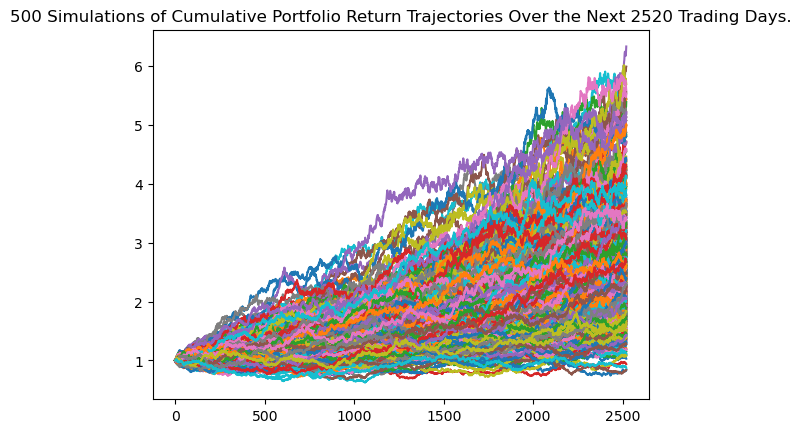

In [207]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot = MC_tenyear.plot_simulation()


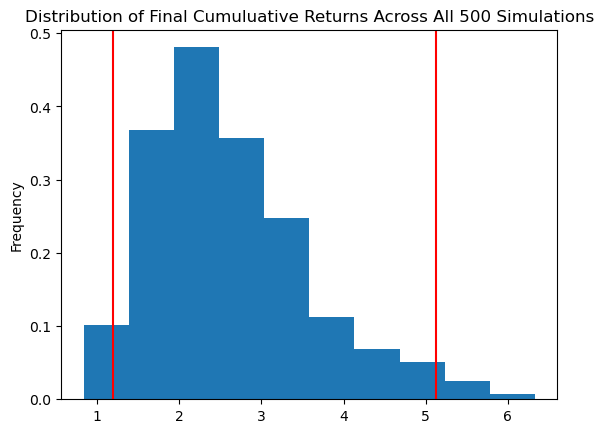

In [208]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_tenyear.plot_distribution()


In [209]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!

print(tbl)


count           500.000000
mean              1.617722
std               0.402740
min               0.737529
25%               1.339266
50%               1.562357
75%               1.851668
max               3.123601
95% CI Lower      0.976297
95% CI Upper      2.637698
Name: 1260, dtype: float64


In [210]:
# Set initial investment
# YOUR CODE HERE!

initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $58577.81 and $158261.9
